# Plot Phase Tensor Ellipses and Tippers (Using Geopandas Lib)

### can cope with diferent projections.

Fei Zhang

2018-10-23

In [1]:
import os
import sys
import glob
import fnmatch
from mtpy.utils.shapefiles_creator import ShapeFilesCreator

2018-11-01T15:02:10 - Fiona - WARNING - PROJ data files not located, PROJ_LIB not set


In [2]:
def recursive_glob(dirname, ext='*.edi'):
    """
    Under the dirname recursively find all files with extension ext.
    Return a list of the full-path to the types of files of interest.
    
    This function is useful to handle a nested directories of EDI files.
    
    :param dirname: a single dir OR a list of dirs.
    :param ext: eg, ".xml"
    :return: a list of path2files
    """

    if isinstance(dirname, (list,)): # the input argument is a list of directory
        filelist = []
        for adir in dirname:
            filelist.extend(recursive_glob(adir))
        return filelist
    else: # input variable is a single dir
        matches = []
        for root, dirnames, filenames in os.walk(dirname):
            for filename in fnmatch.filter(filenames, ext):
                matches.append(os.path.join(root, filename))
        return matches

In [3]:
EDI_DIR=r'C:\mtpywin\mtpy\examples\data\edi_files_2'
EDI_DIR=r'C:\mtpywin\mtpy\examples\data\edi2'
# EDI_DIR=r'C:\mtpywin\mtpy\examples\data\edi_files' # no tipper
# EDI_DIR = 'E:/Data/MT_Datasets/3D_MT_data_edited_fromDuanJM'
# EDI_DIR = r"E:\Data\MT_Datasets\GA_UA_edited_10s-10000s"
# EDI_DIR = r"E:\Data\MT_Datasets\Isa_EDI_edited_10Hz_1000s"
# EDI_DIR = r"E:\Data\MT_Datasets\728889\EDI_files" # narrow area, not shown
# EDI_DIR = r"E:\Data\MT_Datasets\75098\EDI_files"  # cross UTM zones 51 and 52, No tippers?
# EDI_DIR =r"E:\Data\MT_Datasets\75099_Youanmi\EDI_Files_edited"

edifiles=recursive_glob(EDI_DIR)

print("Number of EDI files found = %s"%len(edifiles))

Number of EDI files found = 14


In [4]:
shpobj = ShapeFilesCreator(edifiles, "c:/tmp20181023")


2018-11-01T15:02:11 - mtpy.core.edi_collection - INFO - number of edi files in this collection: 14
number of stations/edifiles = 14
2018-11-01T15:02:11 - mtpy.core.edi_collection - INFO - Number of MT Periods: 56
count    91.000000
mean      0.034154
std       0.015801
min       0.009378
25%       0.021080
50%       0.033665
75%       0.042839
max       0.075346
dtype: float64
2018-11-01T15:02:11 - mtpy.core.edi_collection - INFO - 1,2,3,4 5 Percentile distances: 0.00946357911659, 0.00964636043405, 0.00975718638461, 0.0111086799812, 0.0120027826298


In [5]:
allper=shpobj.all_unique_periods

i=10  # which period index?

In [18]:
# set your projection, this can be a UTM zone projection such as 32754 = S54
my_proj_epsg = 32754 #None # 3112 # projection GDA94/GALCC =3112


gpd_phtensor = shpobj.create_phase_tensor_shp(allper[i],target_epsg_code= my_proj_epsg)[0]

2018-11-01T15:03:07 - mtpy.core.edi_collection - INFO - Automatically Selected Max-Ellispse Size = 0.0047317895583
The plot period is  0.03938403371273286
47.104703692948455
2018-11-01T15:03:08 - Fiona - WARNING - PROJ data files not located, PROJ_LIB not set
2018-11-01T15:03:08 - Fiona - WARNING - PROJ data files not located, PROJ_LIB not set
2018-11-01T15:03:08 - mtpy.core.edi_collection - INFO - Geopandas Dataframe CRS: {'init': 'epsg:32754', 'no_defs': True}


In [19]:
type(gpd_phtensor)

geopandas.geodataframe.GeoDataFrame

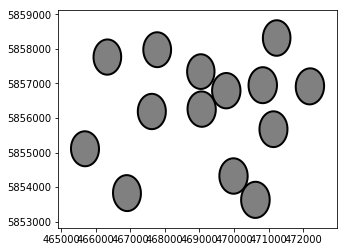

In [20]:
gpd_phtensor.plot(linewidth=2, facecolor='grey', edgecolor='black')


In [21]:
gpd_retip = shpobj.create_tipper_real_shp(allper[i],target_epsg_code= my_proj_epsg)[0]

gpd_imtip = shpobj.create_tipper_imag_shp(allper[i],target_epsg_code= my_proj_epsg)[0]

2018-11-01T15:03:26 - mtpy.core.edi_collection - INFO - Automatically Selected Max Tipper Length  = 0.00946357911659
The plot period is  0.03938403371273286
2018-11-01T15:03:26 - Fiona - WARNING - PROJ data files not located, PROJ_LIB not set
2018-11-01T15:03:26 - Fiona - WARNING - PROJ data files not located, PROJ_LIB not set
2018-11-01T15:03:26 - mtpy.core.edi_collection - INFO - Geopandas Dataframe CRS: {'init': 'epsg:32754', 'no_defs': True}
2018-11-01T15:03:26 - mtpy.core.edi_collection - INFO - Automatically Selected Max-Tipper Length =: 0.00946357911659
The plot period is  0.03938403371273286
2018-11-01T15:03:26 - Fiona - WARNING - PROJ data files not located, PROJ_LIB not set
2018-11-01T15:03:26 - Fiona - WARNING - PROJ data files not located, PROJ_LIB not set
2018-11-01T15:03:26 - mtpy.core.edi_collection - INFO - Geopandas Dataframe CRS: {'init': 'epsg:32754', 'no_defs': True}


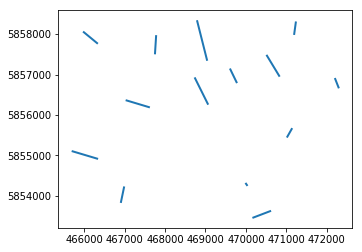

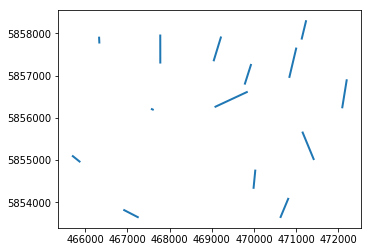

In [22]:
gpd_retip.plot()
gpd_imtip.plot()

In [23]:
gpd_retip.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 15 columns):
azimuth       14 non-null float64
elliptic      14 non-null float64
lat           14 non-null float64
lon           14 non-null float64
n_skew        14 non-null float64
period        14 non-null float64
phi_max       14 non-null float64
phi_min       14 non-null float64
skew          14 non-null float64
station       14 non-null object
tip_ang_im    14 non-null float64
tip_ang_re    14 non-null float64
tip_mag_im    14 non-null float64
tip_mag_re    14 non-null float64
tip_re        14 non-null object
dtypes: float64(13), object(2)
memory usage: 1.7+ KB


In [24]:
gpd_retip.head()

,azimuth,elliptic,lat,lon,n_skew,period,phi_max,phi_min,skew,station,tip_ang_im,tip_ang_re,tip_mag_im,tip_mag_re,tip_re
0,28.550735,0.013384,-37.434183,140.685733,-0.123585,0.039384,47.104704,45.860445,-0.061792,11,101.663641,63.969670,0.004782,0.005524,LINESTRING (472197.5463968406 5856914.14470395...
1,3.566785,0.002382,-37.440583,140.634017,-0.004013,0.039384,45.869329,45.651343,-0.002007,135,-159.728173,-166.368815,0.000587,0.015046,LINESTRING (467625.0329440853 5856187.60601415...
2,-51.698161,0.006326,-37.440017,140.650317,-0.073229,0.039384,46.239601,45.658269,-0.036615,136,-20.198261,-121.750981,0.007168,0.015474,LINESTRING (469066.7061371275 5856255.94788527...
3,-57.706828,0.005230,-37.450233,140.612117,0.034688,0.039384,45.749491,45.273409,0.017344,143,32.761006,13.568587,0.001985,0.016388,LINESTRING (465692.1532305997 5855109.26476076...
4,15.701296,0.009250,-37.426350,140.619550,-0.245762,0.039384,45.792371,44.953000,-0.122881,1R,-93.043013,-146.453974,0.001106,0.010686,LINESTRING (466338.9301017726 5857761.61314142...


In [25]:
import matplotlib.pyplot as plt
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

2018-11-01T15:03:27 - Fiona - WARNING - PROJ data files not located, PROJ_LIB not set


(464921.0062759072, 472973.57601988636, 5852823.708473764, 5859112.333342748)

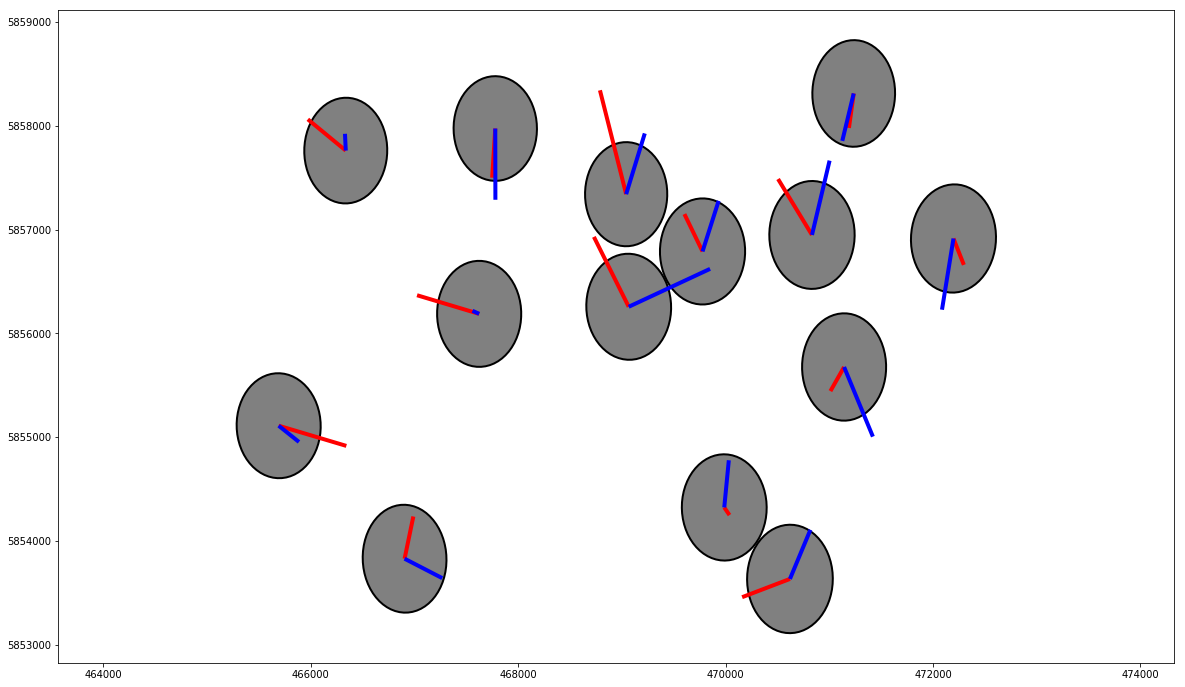

In [26]:
# composing two layers in a map
f, ax = plt.subplots(1, figsize=(20, 12))

# ax.set_xlim([140.5,141])
# ax.set_ylim([-21,-20])

# Add layer of polygons on the axis

gpd_phtensor.plot(ax=ax, linewidth=2, facecolor='grey', edgecolor='black')
gpd_retip.plot(ax=ax, color='red', linewidth=4)
gpd_imtip.plot(ax=ax, color='blue', linewidth=4)
# world.plot(ax=ax, alpha=0.5)  # background map
plt.savefig('phasetensor_tippers.png')
plt.axis('equal')
# Display
#plt.show()

In [27]:
print(gpd_imtip['tip_mag_im'].min(),gpd_imtip['tip_mag_im'].max())

(0.0005869347847457161, 0.00716807446443813)


In [28]:
print(gpd_retip['tip_mag_re'].min(), gpd_retip['tip_mag_re'].max())

(0.0018963459371380527, 0.020465795094333272)


In [29]:
shpobj.stations_distances

{'MAX_DIST': 0.07534597607777978,
 'MIN_DIST': 0.009378240180817825,
 'Q1PERCENT': 0.009463579116592957,
 'Q2PERCENT': 0.009646360434049886,
 'Q3PERCENT': 0.009757186384609168}